In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram

In [152]:
# Chargement du dataset IRIS
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extraction des attributs
X = iris["data"]
y = iris["target"]
target_names = iris["target_names"]

# affectation de chaque atrtribut (sépales + petal) 
sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]

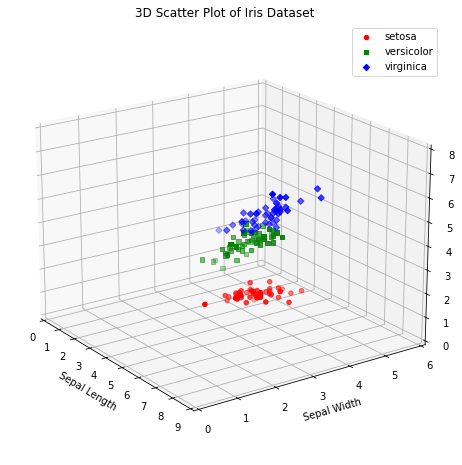

In [153]:
# Création de la figure + axe 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_zlim(0, 8)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

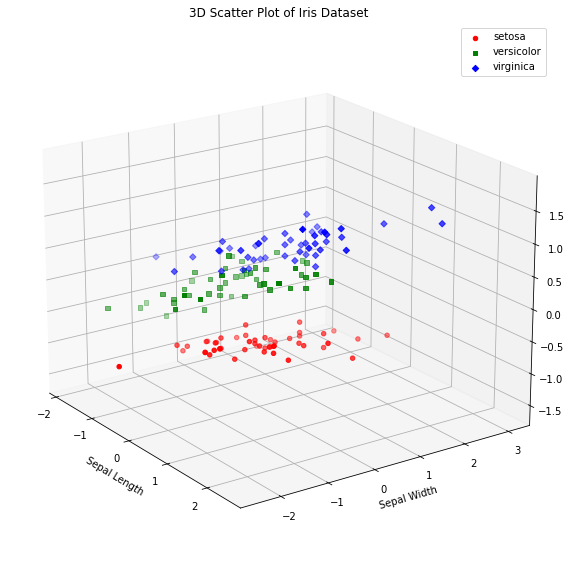

In [154]:
# Centrer et réduire les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# affectation de chaque attribut (sépales + petal) 
sepal_length = data_scaled[:, 0]
sepal_width = data_scaled[:, 1]
petal_length = data_scaled[:, 2]

# Création de la figure + axe 3D avec les données centrés et réduis
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(right=1)
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

In [155]:
# Réduction de dimensionnalité en PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X)

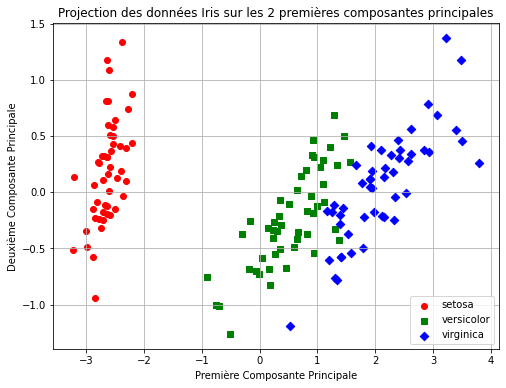

In [156]:
# Représentation de la réduction de dimensions 
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels pour voir la séparation des classes (clusters)
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                marker=marker,
                color=color,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [157]:
# Avec standardisation (centrées, réduites)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X_standard)

0 setosa
1 versicolor
2 virginica


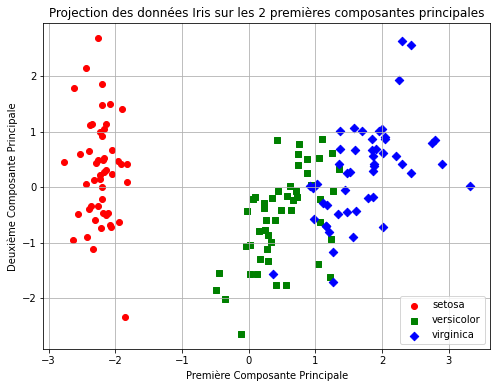

In [158]:
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels afin de voir la séparation des classes
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    print(label, target_name)
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                color=color,
                marker=marker,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
# Matrice de corrélation des variables (sur 3 caractéristiques)
df = pd.DataFrame(X, columns=iris["feature_names"])
correlation_matrix = df.iloc[:, 0:3].corr()
correlation_matrix_full = df.corr()

In [160]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [161]:
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,-0.11757,0.871754
sepal width (cm),-0.117570,1.00000,-0.428440
petal length (cm),0.871754,-0.42844,1.000000


In [162]:
correlation_matrix_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


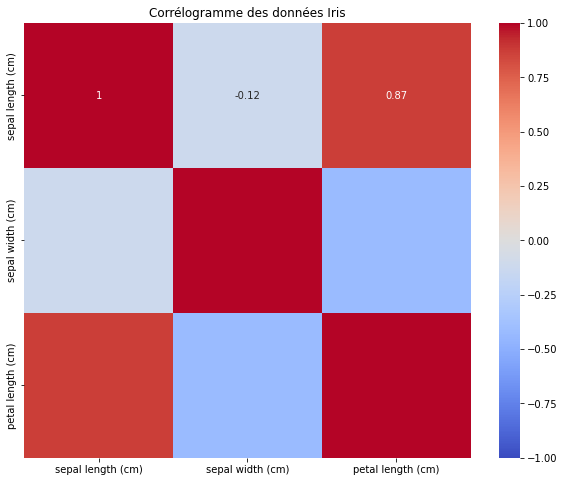

In [163]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,      # Affiche les valeurs de corrélation
            cmap="coolwarm", # Choix de la palette de couleurs
            vmin=-1,         # Fixe la valeur minimale de la barre de couleurs à -1
            vmax=1)          # Fixe la valeur maximale de la barre de couleurs à 1
plt.title('Corrélogramme des données Iris')
plt.show()

In [164]:
# Liste des différentes caractéristiques (variables) de chaque type d'iris
feature_names = iris.feature_names

# matrice de corrélations bivariées (avec numpy)
corr_matrix = np.corrcoef(X, rowvar=False)

In [165]:
# Matrice de corrélation
df = pd.DataFrame(X, columns=feature_names)
corr_matrix = df.corr()

x = []
y = []
size = []
color = []

for i, feature1 in enumerate(feature_names):
    for j, feature2 in enumerate(feature_names):
        x.append(feature1)
        y.append(feature2)
        size.append(abs(corr_matrix.iloc[i, j]) * 100)  # Multiplier par 100 pour ajuster la taille des bulles
        color.append(corr_matrix.iloc[i, j])

# Bubble Chart avec plotly.graph_objects
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=size,
        color=color,
        colorscale='Viridis',
        sizemode='diameter',
        showscale=True
    ),
    text=np.around(color, 2)
))

fig.update_layout(
    title='Bubble Chart des corrélations entre les variables du dataset IRIS',
    xaxis_title='Variable',
    yaxis_title='Variable',
    yaxis_autorange='reversed',  # Inverser l'axe des ordonnées pour une meilleure lisibilité
    hovermode='closest'
)

fig.show()

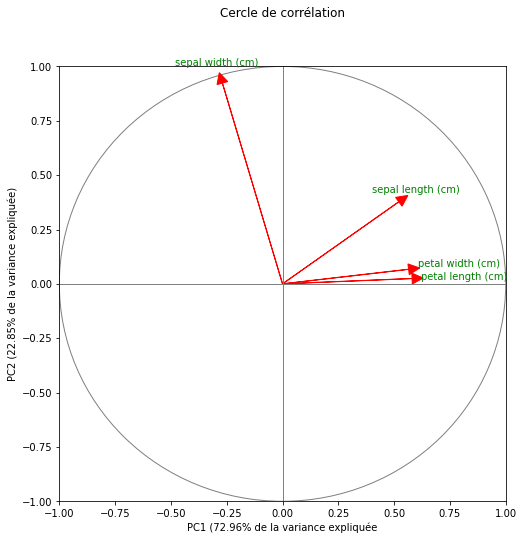

In [166]:
# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))

# Limiter les axes au cercle de rayon 1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', lw=1)
ax.axhline(0, color='grey', lw=1)

# Affichage du cercle
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)

# Affichage des vecteurs correspandant aux caractéristiques de chaque classe d'iris.
ax.arrow(
    0, 0, 
    pca.components_[0, 0], 
    pca.components_[1, 0], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 0]*1.15, 
    pca.components_[1, 0]*1.15, 
    df_iris.columns[0], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 1], 
    pca.components_[1, 1], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 1]*1.10, 
    pca.components_[1, 1]*1.10, 
    df_iris.columns[1], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 2], 
    pca.components_[1, 2], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 2]*1.40, 
    pca.components_[1, 2]*1.40, 
    df_iris.columns[2], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 3], 
    pca.components_[1, 3], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 3]*1.40, 
    pca.components_[1, 3]*1.40, 
    df_iris.columns[3], 
    color='green', ha='center', va='center')


plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de la variance expliquée')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de la variance expliquée)')
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
ax.set_title("Cercle de corrélation", y=1.10)
plt.show()

Les variables petal width et petal length sont fortement corrélées entre elles et sur la 1ère composante principale mais mal représentées (norme = 0.5). La caractéristique sepal width est corrélée à la deuxième composante dont elle est très bien représentée (norme = 1).

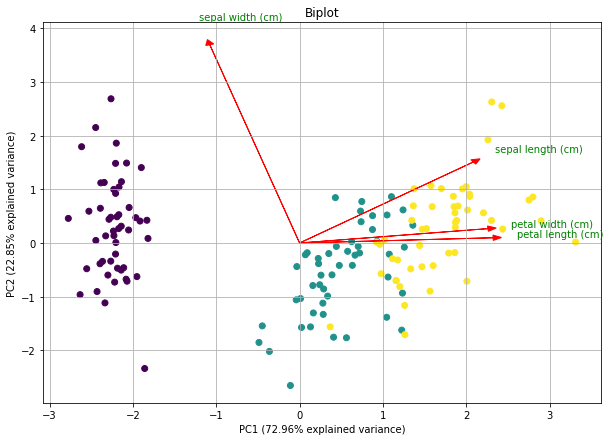

In [167]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)  # scatter plot des scores (observations)

# Ajouter les vecteurs de charge pour chaque variable
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x * 4, y * 4, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(x * 4.5, y * 4.5, iris.feature_names[i], color='g')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
plt.title('Biplot')
plt.grid()
plt.show()

73 % de la variance des variables (features) est représentée sur la 1er composante principale et 23 % sur la deuxième composante. Soit un total de 96 % de la variance est représentée sur ces seules composantes


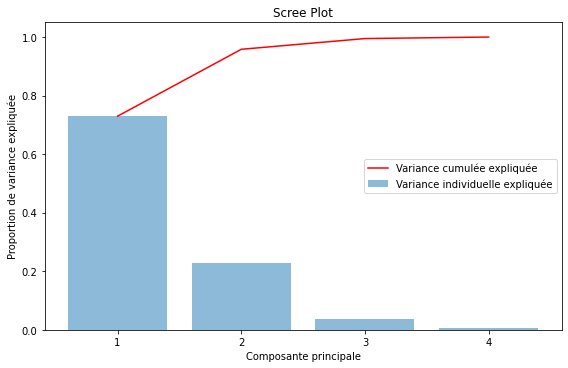

In [168]:
# Proportion de la variance selon le nombre de composantes principales 
pca = PCA()
X_pca = pca.fit_transform(X_standard)

# Nombre de variable
p = X.shape[1] + 1
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variance individuelle expliquée')
#plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Variance cumulée expliquée')
plt.plot(np.arange(1, p), np.cumsum(explained_variance_ratio), label='Variance cumulée expliquée', color="red")
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.ylabel('Proportion de variance expliquée')
plt.xlabel('Composante principale')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Scree Plot')
plt.show()

In [169]:
num_components = np.arange(1, len(pca.explained_variance_) + 1)
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_ * 100  # Pourcentage
cumulative_variance = np.cumsum(explained_variance)      # Variance cumulée en pourcentage

# Création du tableau
df = pd.DataFrame({
    'Composante': num_components,
    'Eigenvalue': eigenvalues.round(4),
    '% Variance': explained_variance.round(4),
    'Variance Cumulée (%)': cumulative_variance.round(2)
})


In [170]:
df

,Composante,Eigenvalue,% Variance,Variance Cumulée (%)
0,1,2.9381,72.9624,72.96
1,2,0.9202,22.8508,95.81
2,3,0.1477,3.6689,99.48
3,4,0.0209,0.5179,100.00


Les valeurs propres (eigenvalues) donnent la proportion de la variance représentée sur chaque composante. Plus le coefficient augmente plus la proportion de la variance expliquée augmente (% variance).

In [171]:
# Facteurs de charge
loadings = pca.components_
df_loadings = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], index=iris.feature_names)
df_loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


- Quelle est pour la CP1, la variable qui présente la saturation la plus forte ?
La variable petal length présente le facteur de charge le plus élevé (0.58)

- Quel lien pouvez-vous effectuer avec le cercle des corrélations vu précédemment ?
Ce facteur représente la norme du vecteur sur le cercle de corrélation représentant ainsi la variance exprimée sur la composante principale dont elle est le plus corrélée (CP1).  

In [172]:
# Facteur de charge max par composante
fc_max = {}
for col in df_loadings.columns:
    max_loading_feature = df_loadings[col].idxmax()
    max_loading_value = df_loadings[col].max()
    fc_max[col] = max_loading_feature
df = pd.DataFrame(fc_max, index=['Variable']).T

In [173]:
# Affichage des variables dont la saturation est la plus élevée par composante.
df

,Variable
PC1,petal length (cm)
PC2,sepal width (cm)
PC3,petal width (cm)
PC4,petal length (cm)


- Quel lien effectuez-vous entre saturation des variables et l’orientation des flèches représentant des vecteurs pour chaque variable ?
Lorsque la saturation des variables est positive la valeur des variables augmente avec leur composante principale ou les autres variables.  

- Expliquez ce que signifie, au juste, la qualité de la représentation d’une variable par une ACP.
La qualité d'une variable est représentée par une ACP est définie par la valeur de sa charge et la corrélation avec sa composante principale.

In [174]:
# Calcule du cos carré
cos2 = loadings**2

# Calculer la contribution de chaque variable
eigenvalues = pca.explained_variance_
contributions = cos2 / eigenvalues.reshape(-1, 1)

# Afficher le cos carré et la contribution
df_cos2 = pd.DataFrame(cos2.T, columns=[f"PC{i+1}" for i in range(cos2.shape[0])], index=iris.feature_names)
df_contributions = pd.DataFrame(contributions.T, columns=[f"PC{i+1}" for i in range(contributions.shape[0])], index=iris.feature_names)

print("Cos carré pour chaque variable :\n", df_cos2)
print("\nContribution de chaque variable :\n", df_contributions)

Cos carré pour chaque variable :
                         PC1       PC2       PC3       PC4
sepal length (cm)  0.271510  0.142444  0.517776  0.068271
sepal width (cm)   0.072548  0.852475  0.059722  0.015255
petal length (cm)  0.336879  0.000600  0.020200  0.642321
petal width (cm)   0.319063  0.004481  0.402302  0.274154

Contribution de chaque variable :
                         PC1       PC2       PC3        PC4
sepal length (cm)  0.092410  0.154803  3.504598   3.273759
sepal width (cm)   0.024692  0.926437  0.404235   0.731501
petal length (cm)  0.114659  0.000652  0.136724  30.801052
petal width (cm)   0.108596  0.004870  2.723006  13.146436


La valeur du cos2 représente la qualité de la représentation de la variable par une composante. La contribution représente  l'importance de la variable dans la formation de la composante c'est à dire à quel point elle participe à sa variance (inertie).

In [175]:
myMap = plt.get_cmap('winter')

Algorithme Kmeans


Fonctionnement général de K-means:
Initialisation: Sélectionnez aléatoirement k points de données comme centroïdes initiaux.
Assignation: Attribuez chaque point de données au centroïde le plus proche.
Mise à jour: Calculez les nouveaux centroïdes en prenant la moyenne des points attribués à chaque ancien centroïde.
Itération: Répétez les étapes 2 et 3 jusqu'à ce que les centroïdes ne changent plus (ou jusqu'à ce que d'autres critères d'arrêt soient satisfaits).
Expectation (E-step) vs Maximization (M-step):
Étape d'Expectation (E-step): Pendant cette étape, l'algorithme "attend" de savoir quel cluster est le plus probable pour chaque point de données, étant donné les positions actuelles des centroïdes. C'est l'étape d'assignation mentionnée ci-dessus où chaque point de données est attribué au centroïde le plus proche.

Étape de Maximisation (M-step): Après avoir décidé (ou "attendu") du cluster le plus probable pour chaque point de données, l'algorithme "maximise" la cohésion du cluster en recalculant et en ajustant les positions des centroïdes. C'est l'étape de mise à jour où les nouveaux centroïdes sont calculés en prenant la moyenne des points attribués à chaque cluster.

Trajectoire des centroïdes:
Au fil des itérations, les centroïdes se déplacent pour se positionner de manière optimale par rapport aux points de données de leurs clusters respectifs. La "trajectoire" de chaque centroïde est le chemin qu'il emprunte depuis sa position initiale jusqu'à sa position finale (ou stable).

Au début, les centroïdes peuvent être dispersés de manière arbitraire, car ils sont généralement choisis au hasard parmi les points de données.
Au fur et à mesure des itérations, les centroïdes se déplacent pour se rapprocher du "centre de masse" de tous les points attribués à ce centroïde.
Finalement, les centroïdes s'immobilisent et ne bougent plus (ou très peu) lorsque l'algorithme converge. Cela signifie qu'ils sont situés à un endroit où la somme des distances carrées entre eux et les points de leur cluster est minimisée.
L'efficacité de K-means dépend de l'initialisation des centroïdes. Des méthodes comme K-means++ ont été proposées pour choisir judicieusement les centroïdes initiaux.

In [176]:
# Réduction sur 2 dimensions
# Avec standardisation (centrées, réduites)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

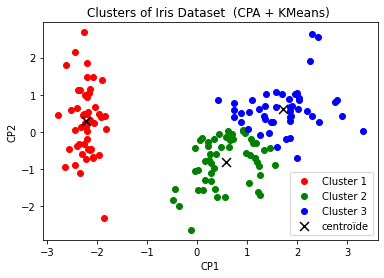

In [177]:
# Initialisation du model Kmeans à 3 clusters
model = KMeans(n_clusters=3, n_init=10)
clusters = model.fit_predict(X_pca)

# Définition des coordonnées et des centroïdes
centroids = model.cluster_centers_
xs = X_pca[:,0]
ys = X_pca[:,1]
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Scatter plot pour chaque cluster
for i, color, label in zip(range(3), ['red', 'green', 'blue'], ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    plt.scatter(xs[clusters == i], ys[clusters == i], color=color, label=label)

plt.scatter(centroids_x, centroids_y, c="black", label="centroïde", marker="x", s=80)
plt.title('Clusters of Iris Dataset  (CPA + KMeans) ')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend()

plt.show()

In [178]:
# Nombre d'espèces 
proportions_especes = []

# Nombre total d'échantillons
nb_tt = len(X)

for i in range(3):
    cluster_data = X[clusters == i]
    
    # Moyennes des variables quantitatives
    means = cluster_data.mean(axis=0)
    print(f"Moyennes pour le Cluster {i + 1}:")
    for mean, feature_name in zip(means, iris.feature_names):
        print(f"{feature_name}: {mean:.2f}")
    
    # Proportions des différentes espèces
    especes_counts = len(cluster_data)
    proportions_especes.append(especes_counts / nb_tt)
    print(f"\nProportions des espèces pour le Cluster {i + 1}:")
    for proportion, especes_name in zip(proportions_especes, iris.target_names):
        print(f"{especes_name}: {proportion:.2f}")
    
    print("-" * 50)






Moyennes pour le Cluster 1:
sepal length (cm): 5.01
sepal width (cm): 3.43
petal length (cm): 1.46
petal width (cm): 0.25

Proportions des espèces pour le Cluster 1:
setosa: 0.33
--------------------------------------------------
Moyennes pour le Cluster 2:
sepal length (cm): 5.80
sepal width (cm): 2.67
petal length (cm): 4.37
petal width (cm): 1.41

Proportions des espèces pour le Cluster 2:
setosa: 0.33
versicolor: 0.35
--------------------------------------------------
Moyennes pour le Cluster 3:
sepal length (cm): 6.78
sepal width (cm): 3.10
petal length (cm): 5.51
petal width (cm): 1.97

Proportions des espèces pour le Cluster 3:
setosa: 0.33
versicolor: 0.35
virginica: 0.31
--------------------------------------------------


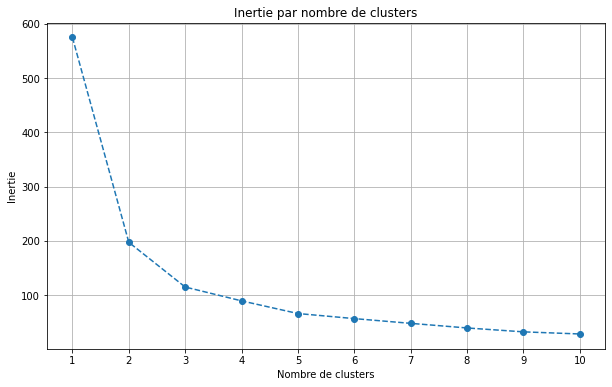

In [179]:
inertie = []
silhouette_scores = []
clusters_range = range(1, 11)
# Calculer l'inertie pour chaque nombre de clusters
for n_clusters in clusters_range:
    model = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = model.fit_predict(X_pca)
    inertie.append(model.inertia_)

# scree plot
plt.figure(figsize=(10, 6))
plt.xticks(range(0, 11))
plt.plot(clusters_range, inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Inertie par nombre de clusters')
plt.grid(True)
plt.show()

Fonctionnement général de K-means:
1.Initialisation: Sélectionnez aléatoirement k points de données comme centroïdes initiaux.
2.Assignation: Attribuez chaque point de données au centroïde le plus proche.
3.Mise à jour: Calculez les nouveaux centroïdes en prenant la moyenne des points attribués à chaque ancien centroïde.
4.Itération: Répétez les étapes 2 et 3 jusqu'à ce que les centroïdes ne changent plus (ou jusqu'à ce que d'autres critères d'arrêt soient satisfaits).

Expectation vs Maximisation:
Étape d'Expectation (E-step): Pendant cette étape, l'algorithme "attend" de savoir quel cluster est le plus probable pour chaque point de données, étant donné les positions actuelles des centroïdes. C'est l'étape d'assignation mentionnée ci-dessus où chaque point de données est attribué au centroïde le plus proche.

Étape de Maximisation (M-step): Après avoir décidé (ou "attendu") du cluster le plus probable pour chaque point de données, l'algorithme "maximise" la cohésion du cluster en recalculant et en ajustant les positions des centroïdes. C'est l'étape de mise à jour où les nouveaux centroïdes sont calculés en prenant la moyenne des points attribués à chaque cluster.

Interprétation du Graphique de l'inertie en fonction du nombre de clusters:

Lorsque le nombre de clusters (k) augmente, l'inertie diminue parce que les points sont plus proches de leur centroïde.
L'augmentation de k devient de moins en moins utile à un certain point, formant un "coude" dans le graphique de l'inertie en fonction de k.
Le point où l'inertie commence à diminuer à un taux plus lent (le "coude") est souvent choisi comme une bonne estimation du nombre optimal de clusters.

Dans l'exemple ci-dessus le nombre clusters optimal semble être de 3. Des valeurs supérieurs ne semblent modifier l'inertie intra-cluster ne manière significative.

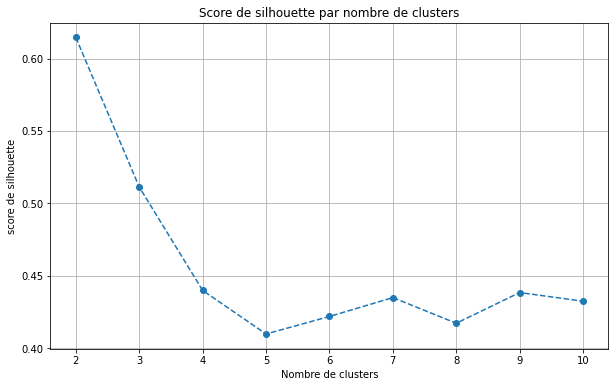

In [180]:
silhouette_scores = []
clusters_range = range(2, 11)
# Calculer l'inertie pour chaque nombre de clusters
for n_clusters in clusters_range:
    model = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = model.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# scree plot
plt.figure(figsize=(10, 6))
plt.xticks(range(2, 11))
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('score de silhouette')
plt.title('Score de silhouette par nombre de clusters')
plt.grid(True)
plt.show()

Principe de ma méthode de la silouhette:

Score de Silhouette: Le score de silhouette mesure à quel point un objet (un type d'iris) est similaire à son propre cluster (cohésion) par rapport aux autres clusters (séparation).

Nombre de Clusters: La méthode de la silhouette vise à trouver le nombre de clusters qui maximise le score moyen de silhouette sur toutes les données.

Des scores plus élevés indiquent que l'objet est bien couplé avec son propre cluster et mal couplé avec les clusters voisins.
Lorsque ce score est maximisé, les clusters sont considérés comme bien séparés et, par conséquent, plus distincts.

Dans le graphique ci dessus le nombre de clusters optimal serait de 2 ou de 3, car les coefficients de silouhette sont les plus élevés pour ces derniers. 

2 - Projet Décathlon

In [181]:
df_decathlon = pd.read_csv('../csv/decathlon.csv', sep=";")

In [182]:
df_decathlon

,Unnamed: 0,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,OlympicG
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,3,8725,OlympicG
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,OlympicG
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,5,8343,OlympicG
5,Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,OlympicG
6,Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,OlympicG
7,Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,OlympicG
8,Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,9,8225,OlympicG
9,Schwarzl,10.98,7.49,14.01,1.94,49.76,14.25,42.43,5.10,56.32,273.56,10,8102,OlympicG


In [183]:
# Features
X = df_decathlon.loc[:, "100m":"1500m"]

# Labels
competitions = df_decathlon["Competition"]

# Encodage des labels afin de les transformer numériquement
l_encod = LabelEncoder()
y_encod = l_encod.fit_transform(competitions)

In [184]:
# Réduction de dimentionnalité
pca = PCA()
X_pca = pca.fit_transform(X)

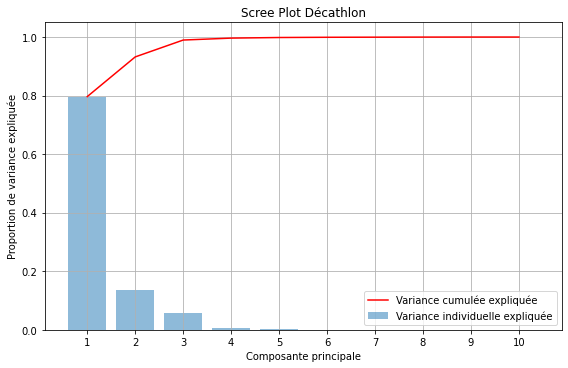

In [185]:
# Nombre de variable
p = X.shape[1] + 1
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variance individuelle expliquée')
plt.plot(np.arange(1, p), np.cumsum(explained_variance_ratio), label='Variance cumulée expliquée', color="red")
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.ylabel('Proportion de variance expliquée')
plt.xlabel('Composante principale')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Scree Plot Décathlon')
plt.grid()
plt.show()

In [186]:
# Normalisation des données
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Réduction de dimentionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

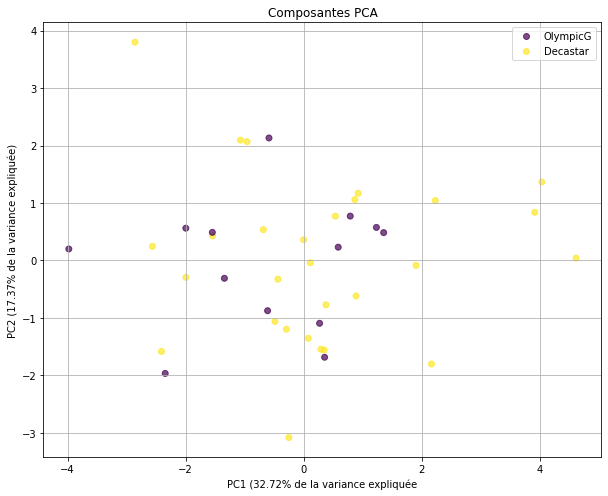

In [187]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encod, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Composantes PCA')
plt.legend(handles=scatter.legend_elements()[0], labels=set(competitions))
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de la variance expliquée')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de la variance expliquée)')
plt.grid(True)
plt.show()

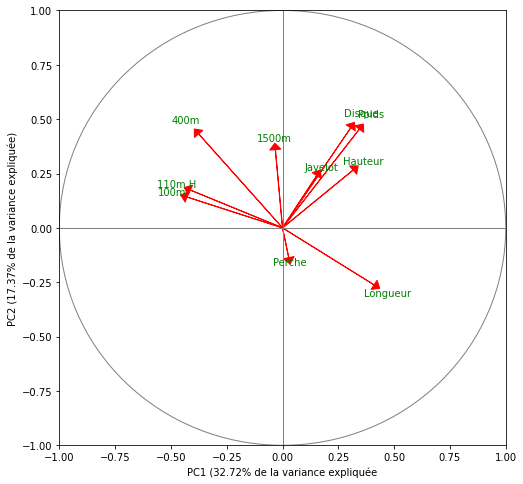

In [188]:
features = X.columns

# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))

# Limiter les axes au cercle de rayon 1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', lw=1)
ax.axhline(0, color='grey', lw=1)

# Affichage du cercle
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)

# Affichage des vecteurs correspandant à chaque discipline sur les 2 premières composantes
for i in range(0, pca.components_.shape[1]): 
    ax.arrow(
        0, 0, 
        pca.components_[0, i], #vecteur x
        pca.components_[1, i], #vecteur y
        head_width=0.05, 
        head_length=0.03, 
        fc='red', ec='red')

    ax.text(
        pca.components_[0, i]*1.15, 
        pca.components_[1, i]*1.15, 
        features[i], 
        color='green', ha='center', va='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de la variance expliquée')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de la variance expliquée)')

plt.show()

Le model explique mal la variance des données puisque celles-ci ne répresentent que 32.71% sur PC1 et 17.37% sur PC2.
On constate également que la la plupart des disciplines sont mal corrélées aux composantes principales à l'exeption du 1500M, 110m Haies et 100m (fortement corrélées ensemble), respectivement corrélés avec PC2 et PC1. La perche est fortement corrélée à PC2 mais dont la force est faible.   

In [189]:
# Map des couleurs selon le type de compétition
competitions = df_decathlon["Competition"].unique()
color_mapping = {competitions[0]: 'red', competitions[1]: 'blue'}
colors = df_decathlon['Competition'].map(color_mapping)

In [190]:
# Qualité de la représentation de chaque individu sur les composantes principales
squared_distances = X_pca ** 2
representational_quality = squared_distances / pca.explained_variance_ * 10

# Taille des bulles par rapport à la qualité de representation
sizes = np.sum(representational_quality, axis=1)

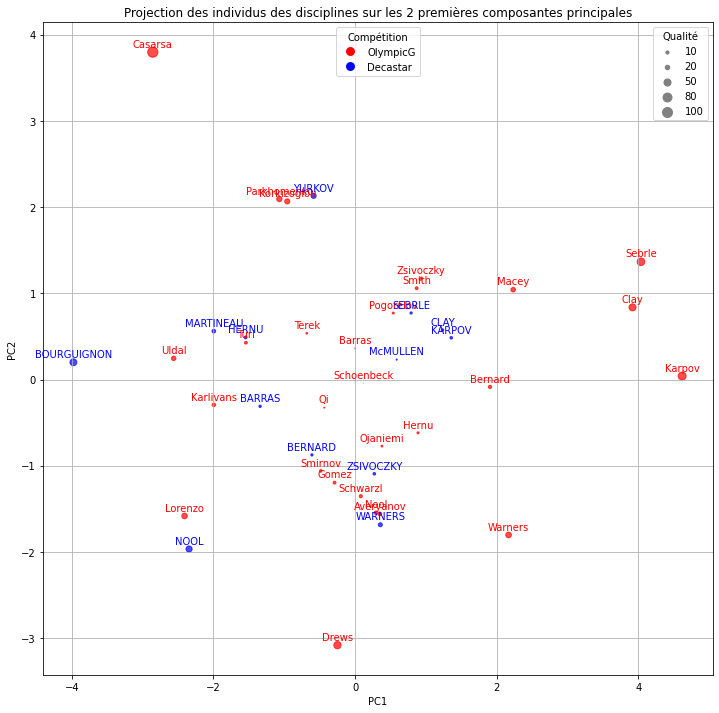

In [191]:
fig, ax = plt.subplots(figsize=(12,12))
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=colors, s=sizes, alpha=0.7, 
    )
    
names = df_decathlon.iloc[:, 0]
for i, (name, color) in enumerate(zip(names, colors)):
    ax.annotate(
        name, (X_pca[i, 0], X_pca[i, 1]), 
        textcoords="offset points", xytext=(0,5), 
        ha='center', color=color, label=label)

#ax.add_artist(legend1)
ax.grid(True)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
legend_elements = [Line2D([0], [0], marker='o', color='w', label=competitions[0], markersize=10, markerfacecolor='red'),
                   Line2D([0], [0], marker='o', color='w', label=competitions[1], markersize=10, markerfacecolor='blue')]
legend1 = ax.legend(handles=legend_elements, loc='upper center',  bbox_to_anchor=(0.5, 1), title="Compétition")
ax.add_artist(legend1)
legend_sizes = [10, 20, 50, 80, 100]  # tailles affichées dans la légende
legend_labels = [f'{s}' for s in legend_sizes]
points = [ax.scatter([], [], s=s, label=label, color='gray') for s, label in zip(legend_sizes, legend_labels)]
ax.legend(handles=points, loc='upper right', title='Qualité')
plt.title('Projection des individus des disciplines sur les 2 premières composantes principales')
plt.show()

In [192]:
# Dataframe décathlon + encodage des compétitions
df_decathlon["encodage"] = y_encod

In [193]:
df_decathlon.head()

,Unnamed: 0,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition,encodage
0,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG,1
1,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG,1
2,Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG,1
3,Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG,1
4,Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG,1


In [194]:
# Réduction de dimentionnalité sur 3 composantes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standard)

In [195]:
# Coordonnées des individus par composante sur 3 axes 
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]
PC3 = X_pca[:, 2]

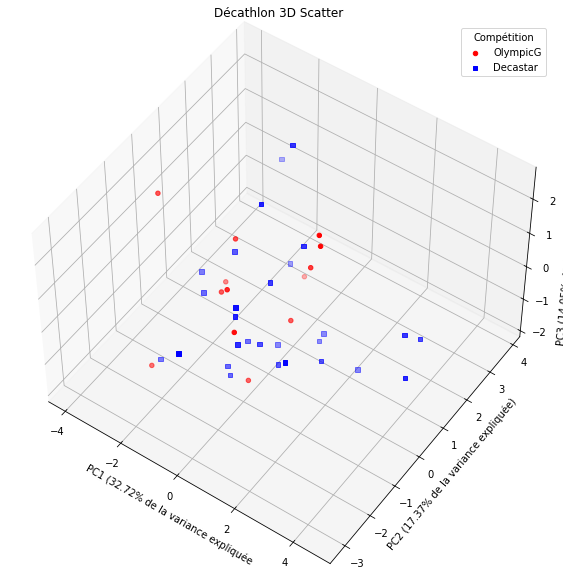

In [196]:
# Création de la figure + axe 3D avec les données centrées et réduites
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(right=1)
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'b']
markers = ['o', 's']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = df_decathlon["encodage"] == i
    ax.scatter(
        PC1[indices],
        PC2[indices],
        PC3[indices],
        c=color,
        marker=marker, 
        label=competitions[i])

# Définition des étiquettes des axes et le titre
ax.view_init(elev=50., azim=-55, roll=0)
ax.legend(title="Compétition")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Décathlon 3D Scatter')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de la variance expliquée')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de la variance expliquée)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} de la variance expliquée)')
#ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} de la variance expliquée)', labelpad=10)
#plt.tight_layout()
plt.show()

K-means:
Avantages:

1 - Vitesse et efficacité: K-means est généralement plus rapide que CAH, en particulier pour les grands ensembles de données.
2 - Efficacité avec de grands volumes de données

Inconvénients:

1 - Choix du K: Il faut choisir le nombre de clusters avant de lancer l'algorithme, ce qui peut ne pas être évident.
2 - Sensibilité aux points de départ: K-means est sensible aux points de départ, ce qui signifie qu'il peut aboutir à des clusters différents selon le choix des points de départ.


Clustering hiérarchique agglomératif (CAH):
Avantages:

1 - Pas besoin de spécifier le nombre de clusters: Contrairement à K-means, on a pas besoin de spécifier le nombre de clusters à l'avance. Le dendrogramme généré permet de choisir le nombre de clusters en fonction de l'analyse.
2 - Richesse des informations: Le dendrogramme donne une vue hiérarchique de la structure de regroupement.

Inconvénient :
1 - Non adapté aux grands ensembles de données

En résumé :
K-means est généralement préféré pour les grands ensembles de données où la vitesse et l'efficacité sont essentielles, et lorsque la forme sphérique des clusters est acceptable.

CAH est plus adapté lorsque vous avez des ensembles de données plus petits, que vous n'êtes pas sûr du nombre de clusters, ou que vous voulez une représentation hiérarchique des données.

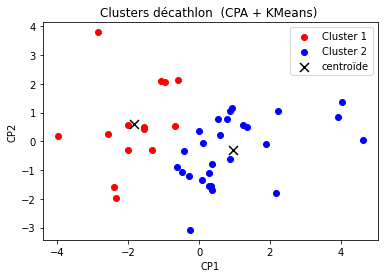

In [197]:
# clustering Kmeans:

# Initialisation du model Kmeans à 2 clusters
model = KMeans(n_clusters=2, n_init=10)
clusters = model.fit_predict(X_pca)

# Définition des coordonnées et des centroïdes
centroids = model.cluster_centers_
xs = X_pca[:,0]
ys = X_pca[:,1]

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Scatter plot pour chaque cluster
for i, color, label in zip(range(3), ['red', 'blue'], ['Cluster 1', 'Cluster 2']):
    plt.scatter(xs[clusters == i], ys[clusters == i], color=color, label=label)

plt.scatter(centroids_x, centroids_y, c="black", label="centroïde", marker="x", s=80)
plt.title('Clusters décathlon  (CPA + KMeans) ')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend()

plt.show()

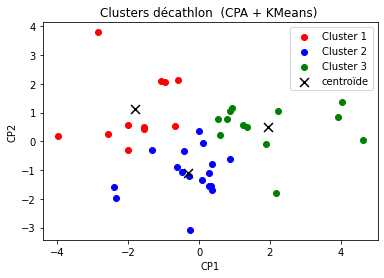

In [198]:
# clustering Kmeans: (test avec 3 clusters)

# Initialisation du model Kmeans à 3 clusters
model = KMeans(n_clusters=3, n_init=10)
clusters = model.fit_predict(X_pca)

# Définition des coordonnées et des centroïdes
centroids = model.cluster_centers_
xs = X_pca[:,0]
ys = X_pca[:,1]
zs = X_pca[:,2]

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Scatter plot pour chaque cluster
for i, color, label in zip(range(3), ['red', 'blue', 'green'], ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    plt.scatter(xs[clusters == i], ys[clusters == i], color=color, label=label)

plt.scatter(centroids_x, centroids_y, c="black", label="centroïde", marker="x", s=80)
plt.title('Clusters décathlon  (CPA + KMeans) ')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend()

plt.show()

Nous observons qu'avec un niveau de 3 clusters, l'inertie pour 2 d'entre eux (bleu et rouge) est médiocre. Donc un nombre supérieur à 2 clusters n'apporte pas une meilleure classification des données.

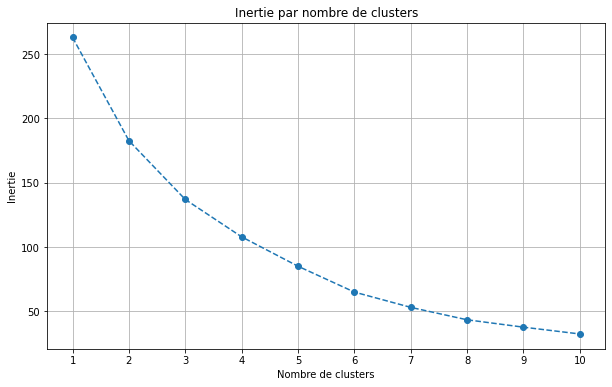

In [199]:
inertie = []
silhouette_scores = []
clusters_range = range(1, 11)
# Calculer l'inertie pour chaque nombre de clusters
for n_clusters in clusters_range:
    model = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = model.fit_predict(X_pca)
    inertie.append(model.inertia_)

# scree plot
plt.figure(figsize=(10, 6))
plt.xticks(range(0, 11))
plt.plot(clusters_range, inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Inertie par nombre de clusters')
plt.grid(True)
plt.show()

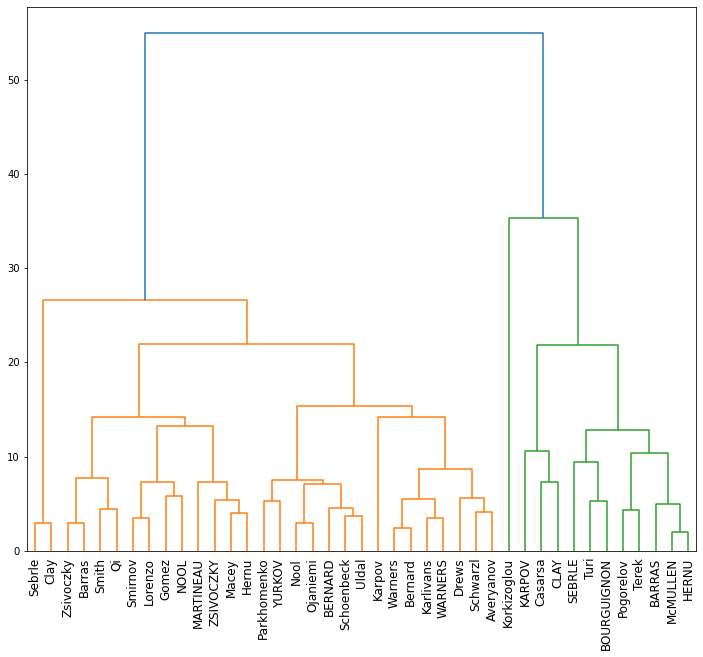

In [200]:
labels = df_decathlon.iloc[:, 0] # Noms des athlètes
mergings = linkage(X, method="complete")
names = labels.to_list()

plt.figure(figsize=(12, 10))
dendrogram(
    mergings,
    labels=names,
    leaf_rotation=90,
    leaf_font_size=12
)
plt.show()

Sur la figure ci-dessus nous pouvons observer nettement la formation de 2 clusters distincts.